# Visualizing data

Before you endeavor on data analysis, it is typical to visualize the data. Data visualization may help with a `gut check` on data quality and validation. Additionally, since a lot of techniques make certain strong assumptions on the characteristics of data, seeing the data may help to see in which ways it deviates from those assumptions. In this notebook, we show a few ways to visualize data using univariate, bivariate and multivariate techniques.

## Loading data

Let's load up the [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) data. This data contains measurements of the sepal length and width and petal length and width of 3 flower species (4 variables). This data is typically bundled in many data analysis package for testing various machine learning algorithms. Here, we are loading up the iris data set from `Scikit-Learn`. Note that we load the data into a matrix $X$ and vector $y$, where $X$ is a matrix of of the 4 variables over 150 observations. In machine learning, it is typical to denote $X$ as a matrix of observations and independent variables with $y$ as a vector of the target (or dependent) variable. Later, we also convert $X$ and $y$ into a `Pandas` dataframe for easier use with `Seaborn`.

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
X, y = iris.data, iris.target

In [5]:
X.shape

(150, 4)

In [6]:
y.shape

(150,)

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    np.hstack([X, np.array([iris.target_names[v] for v in y]).reshape(-1, 1)]), 
    columns=['sepal_width', 'sepal_height', 'petal_width', 'petal_height', 'species'])
df = df.astype({k: np.float for k in df.columns if k != 'species'})

## Univariate visualization

Univariate visualizations center on displaying one variable at a time.

### Univariate distribution

It is common to simply observe the distribution of a variable. Typically, you want to see the shape (modes and spread) of the variable. In a lot of cases, it helps if the distribution of a variable follows a Gaussian distribution. For continuous variables, the function generating the data is called the `probability density function` (PDF) and for categorical variables, `probability mass function` (PMF).

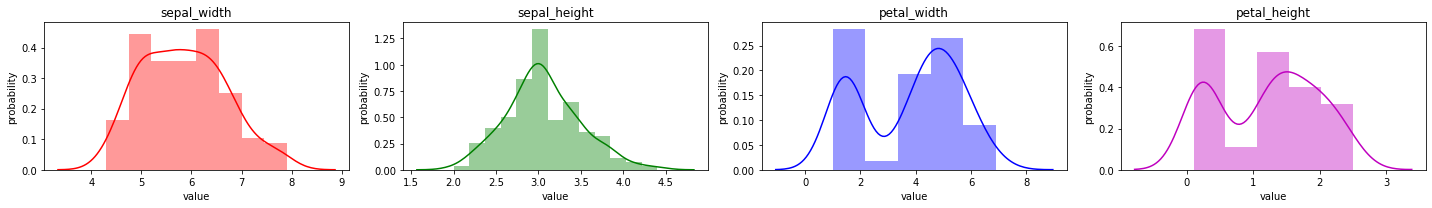

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

colors = cycle(['r', 'g', 'b', 'm'])
columns=['sepal_width', 'sepal_height', 'petal_width', 'petal_height']
n_vars = len(columns)

n_cols = 4
n_rows = n_vars / n_cols if n_vars % n_cols == 0 else (n_vars / n_cols) + 1
n_plots = int(n_cols * n_rows)

fig = plt.figure(figsize=(20, 3))

for i in range(n_plots):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    
    if i < n_vars:
        sns.distplot(X[:,i], ax=ax, color=next(colors), kde=True, norm_hist=True, hist=True)
        ax.set_title(columns[i])
        ax.set_xlabel('value')
        ax.set_ylabel('probability')
    else:
        ax.axis('off')
        
plt.tight_layout()

### Box plots

While a density plot may give you clues on the `PDF` (or `PMF`), a `box plot` (or `box-and-whisker` plot) gives you clue on `outliers` in your data. The middle line represents the median over all the data points (the global median); the left line is called the first quartile or `Q1` and it is the median of all data points to the left of the global median; the right line is called the third quartile or `Q3` and it is the median of all data points to the right of the global median. The distance from `Q1` to `Q3` is called the inter-quartile range, `IQR`. The left whisker is `Q1 + 1.5 x IQR` and the right whisker is `Q3 + 1.5 x IQR`. Anything outside of the whiskers are considered `outliers`. The left and right whiskers are often referred to as the `min` and `max`.

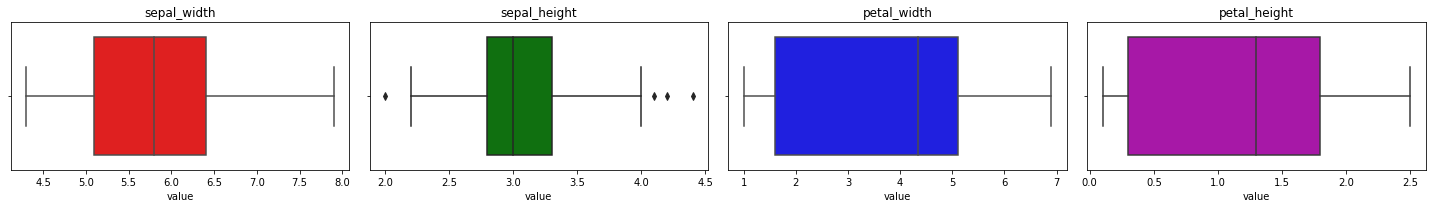

In [11]:
colors = cycle(['r', 'g', 'b', 'm'])
n_cols = 4
n_rows = n_vars / n_cols if n_vars % n_cols == 0 else (n_vars / n_cols) + 1
n_plots = int(n_cols * n_rows)

fig = plt.figure(figsize=(20, 3))

for i in range(n_plots):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    
    if i < n_vars:
        sns.boxplot(X[:,i], ax=ax, color=next(colors))
        ax.set_title(columns[i])
        ax.set_xlabel('value')
    else:
        ax.axis('off')
        
plt.tight_layout()

### Pie and bar graph

Since we have a categorical variable, the `species` of the flower, we may use a `pie` and `bar` graph to plot the proportion and distribution of the classes.

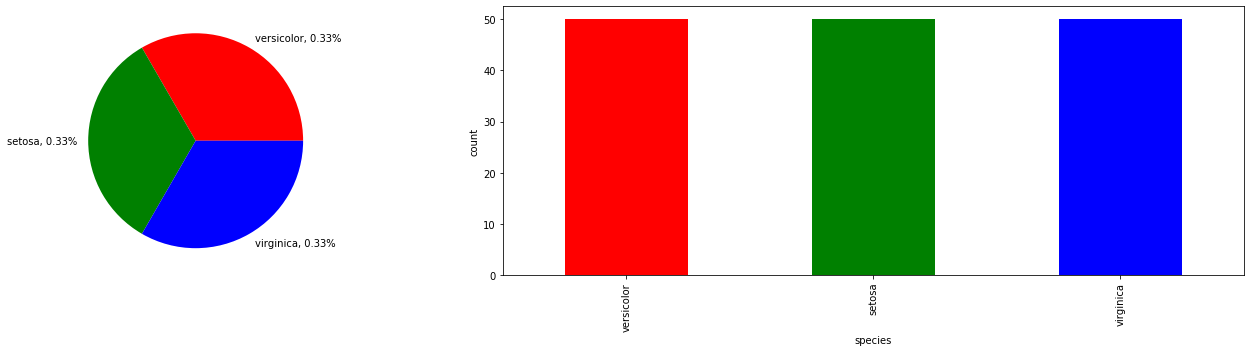

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

species = df['species'].value_counts()
proportions = species / species.sum()
labels = ['{}, {:.2}%'.format(i, v) for i, v in proportions.items()]

species.plot.pie(ax=ax[0], colors=['r', 'g', 'b'], labels=labels)
species.plot.bar(ax=ax[1], color=['r', 'g', 'b'])

ax[0].set_ylabel('')
ax[1].set_ylabel('count')
ax[1].set_xlabel('species')
plt.tight_layout()

## Bivariate visualization

A bivariate visualization display the relationship between two variables at a time.

### Density plot

Here we plot a join density plot between all pairs of variables (there are 6 such pairs). 

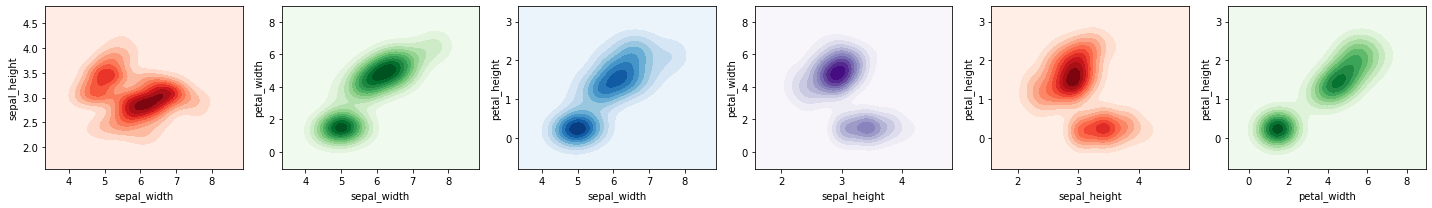

In [13]:
from itertools import combinations

colors = cycle(['Reds', 'Greens', 'Blues', 'Purples'])
columns=['sepal_width', 'sepal_height', 'petal_width', 'petal_height']
pairs = [comb for comb in combinations(columns, 2) if comb[0] != comb[1]]
n_pairs = len(pairs)

n_cols = 6
n_rows = n_pairs / n_cols if n_pairs % n_cols == 0 else (n_pairs / n_cols) + 1
n_plots = int(n_cols * n_rows)

fig = plt.figure(figsize=(20, 3))

for i in range(n_plots):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    
    if i < n_pairs:
        label_x = pairs[i][0]
        label_y = pairs[i][1]
        
        x = df[label_x]
        y = df[label_y]
        sns.kdeplot(x, y, shade=True, cmap=next(colors))
    else:
        ax.axis('off')
        
plt.tight_layout()

### Regression plot

We may also plot two variables against one another using a regression plot. The assumption with a regression plot is that the relationship between the two variables are linear (the solid line in each plot), which may not hold or be true.

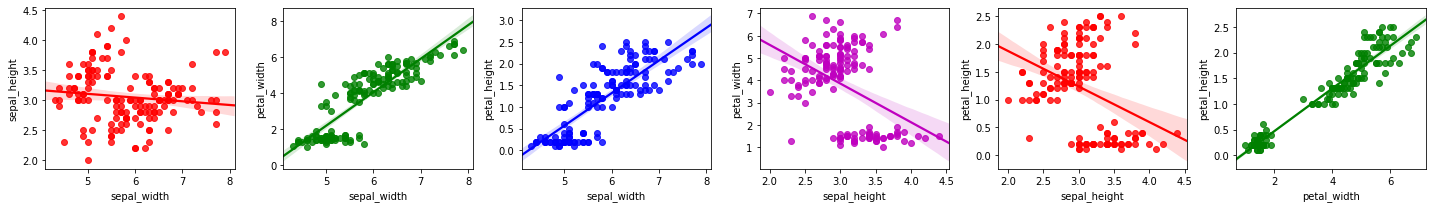

In [14]:
colors = cycle(['r', 'g', 'b', 'm'])
columns=['sepal_width', 'sepal_height', 'petal_width', 'petal_height']
pairs = [comb for comb in combinations(columns, 2) if comb[0] != comb[1]]
n_pairs = len(pairs)

n_cols = 6
n_rows = n_pairs / n_cols if n_pairs % n_cols == 0 else (n_pairs / n_cols) + 1
n_plots = int(n_cols * n_rows)

fig = plt.figure(figsize=(20, 3))

for i in range(n_plots):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    
    if i < n_pairs:
        label_x = pairs[i][0]
        label_y = pairs[i][1]
        
        x = df[label_x]
        y = df[label_y]
        sns.regplot(x, y, color=next(colors))
    else:
        ax.axis('off')
        
plt.tight_layout()

### Heatmap

The heatmap is also a way to plot the pair-wise correlations. Note the assumption here is that the correlation is linear, which may not be true.

[Text(0.5, 0, 'sepal_width'),
 Text(1.5, 0, 'sepal_height'),
 Text(2.5, 0, 'petal_width'),
 Text(3.5, 0, 'petal_height')]

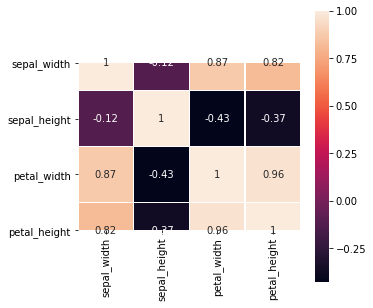

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
g = sns.heatmap(np.corrcoef(X.T), yticklabels=columns, xticklabels=columns, 
                linewidths=.5, annot=True, square=True, ax=ax, cbar=True)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

## Categorical plots

We may plot the continuous variables partitioned by a categorical variable. This type of visualization allows us to see how the data distributions changes based on the the categorical variable.

### Pair plot

The pair plot shows distribution plots partitioned by the values of a categorical variable in the diagonal. In the off-diagonal plots are scatter plots.

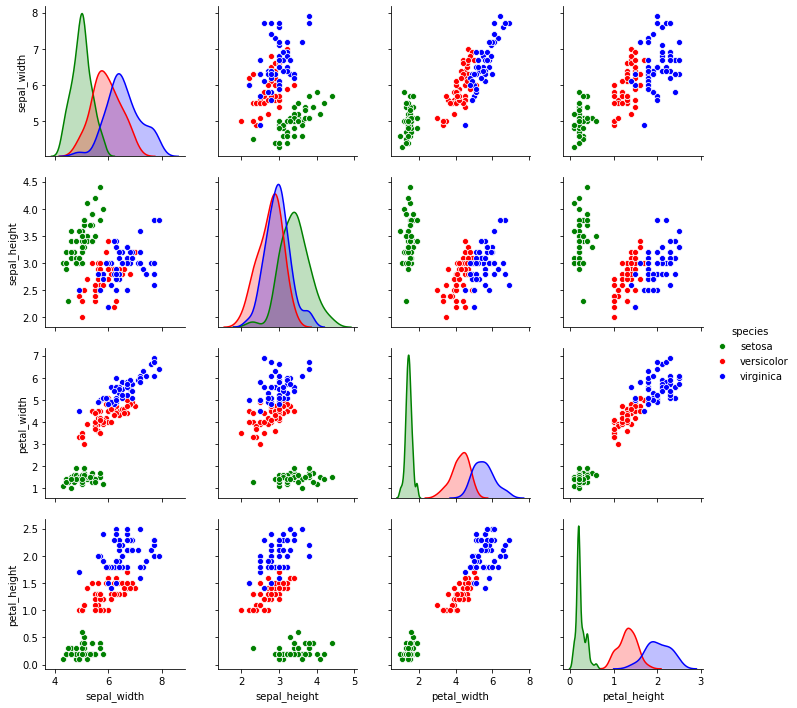

In [16]:
palette = {'setosa': 'g', 'versicolor': 'r', 'virginica': 'b'}

sns.pairplot(df, hue='species', palette=palette)

### Box plots by category (species)

We may revisit box plots by plotting the distribution of each variable by species.

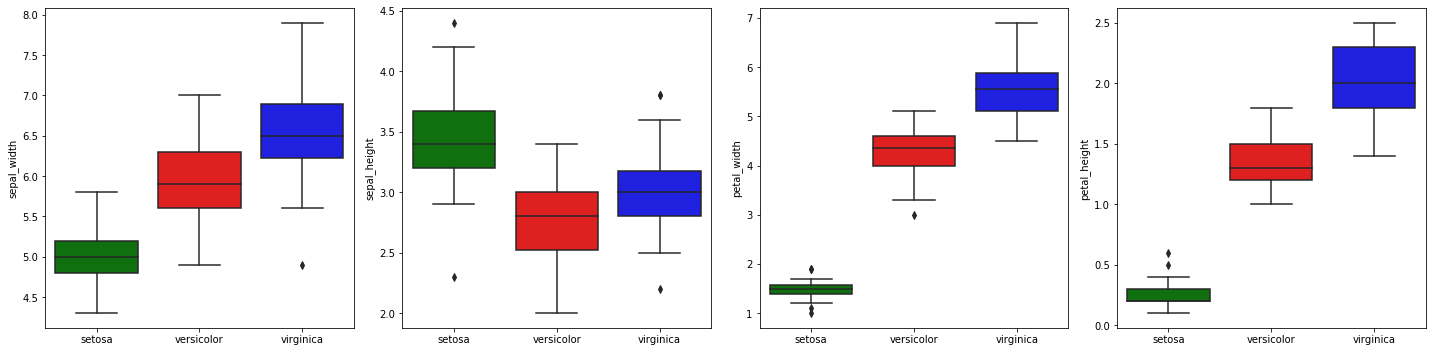

In [17]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
axes = np.ravel(ax)

for a, c in zip(axes, ['sepal_width', 'sepal_height', 'petal_width', 'petal_height']):
    sns.boxplot(x='species', y=c, data=df, palette={'setosa': 'g', 'versicolor': 'r', 'virginica': 'b'}, ax=a)
    a.set_xlabel('')
    
plt.tight_layout()

## Multivariate visualization

Multivariate visualizations are the most difficult visualizations since you are dealing with 3 or more variables. For 3 variables, it is not terribly difficult to visualize since we operate in a 3 dimensional world. When the number of variables (or dimensions) exceed 3, it becomes very difficult to fathom how data looks like in such high dimensional space.

### Three-dimensional plot

Here, we plot all 3-pairs (there are 4 such pairs) of variables in 3 dimensional space.

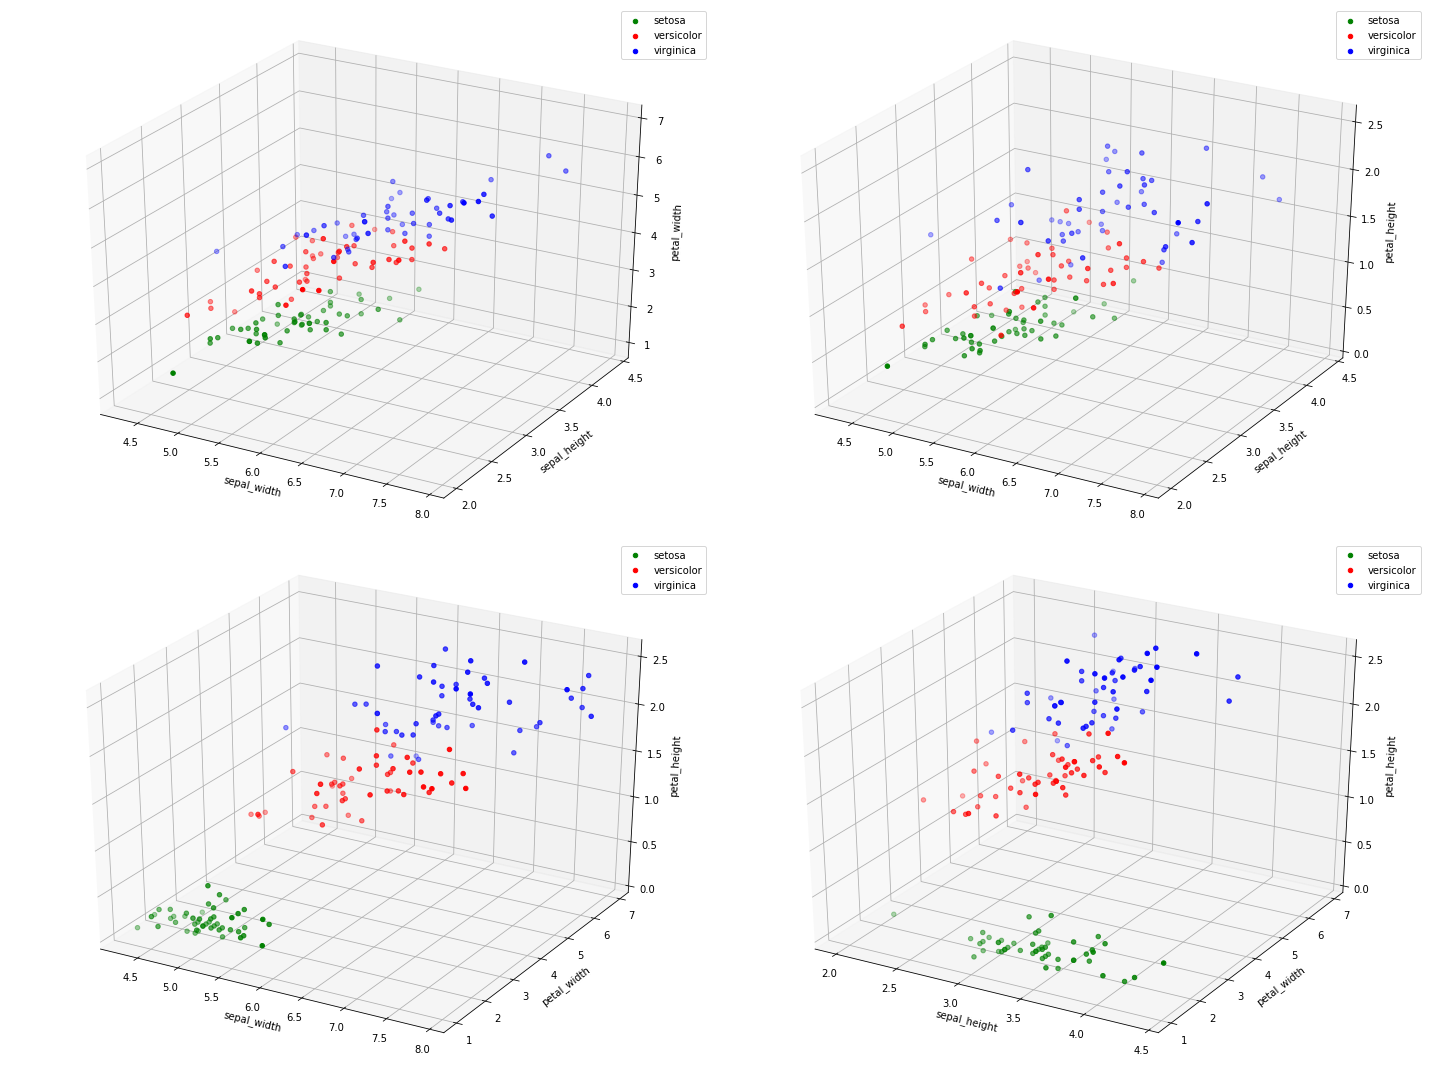

In [18]:
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

combos = list(combinations(['sepal_width', 'sepal_height', 'petal_width', 'petal_height'], 3))
n_combos = len(combos)

fig = plt.figure(figsize=(20, 15))

for i, combo in enumerate(combos):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')

    for s, c in palette.items():
        d = df[df['species'] == s]
        x, y, z = d[combo[0]], d[combo[1]], d[combo[2]]
        ax.scatter3D(x, y, z, color=c, label=s)
        ax.set_xlabel(combo[0])
        ax.set_ylabel(combo[1])
        ax.set_zlabel(combo[2])
        ax.legend()
        
plt.tight_layout()

### Parallel coordinate plot

One of the best ways to visualize high-dimensional data is through [parallel coordinates](https://en.wikipedia.org/wiki/Parallel_coordinates). There is much theory developed behind parallel coordinates (see [Wegman 2002](https://web.archive.org/web/20131224111246/http://herakles.zcu.cz/seminars/docs/infovis/papers/Moustafa_generalized_parallel_coordinates.pdf)). The idea is that a point in n-dimensional space becomes a line in parallel coordinates. For n-dimensional space, there are correspondingly n-axes in parallel coordinate space. 

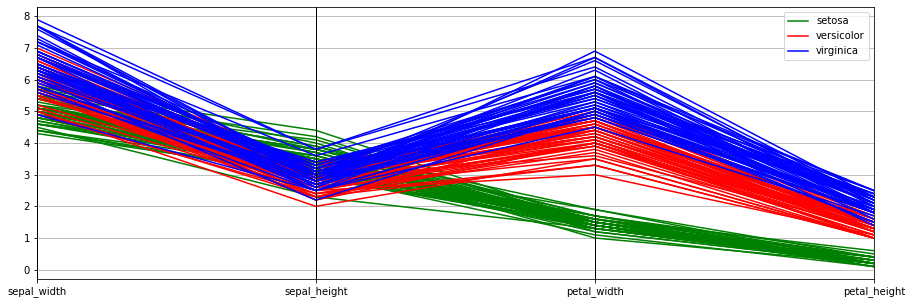

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
pd.plotting.parallel_coordinates(df, 'species', ax=ax, color=['g', 'r', 'b'])

## Visualizing missing data

Here, we purposefully make some data [missing at random](https://en.wikipedia.org/wiki/Missing_data) (and some not missing at random). We then use the `missingno` package to visualize the missingness of the data in a few different ways.

In [20]:
from numpy.random import randint

np.random.seed(37)

missing_df = df.copy()
n_data_points = missing_df.shape[0] * missing_df.shape[1]
n_missing = int(0.10 * n_data_points)

for i in range(n_missing):
    i_loc = randint(missing_df.shape[0])
    j_loc = randint(missing_df.shape[1])
    missing_df.iloc[i_loc, j_loc] = np.nan
    
j1 = missing_df.shape[1] - 1
j2 = missing_df.shape[1] - 2
for i in range(n_missing):
    i_loc = randint(missing_df.shape[0])
    missing_df.iloc[i_loc, j1] = np.nan
    missing_df.iloc[i_loc, j2] = np.nan

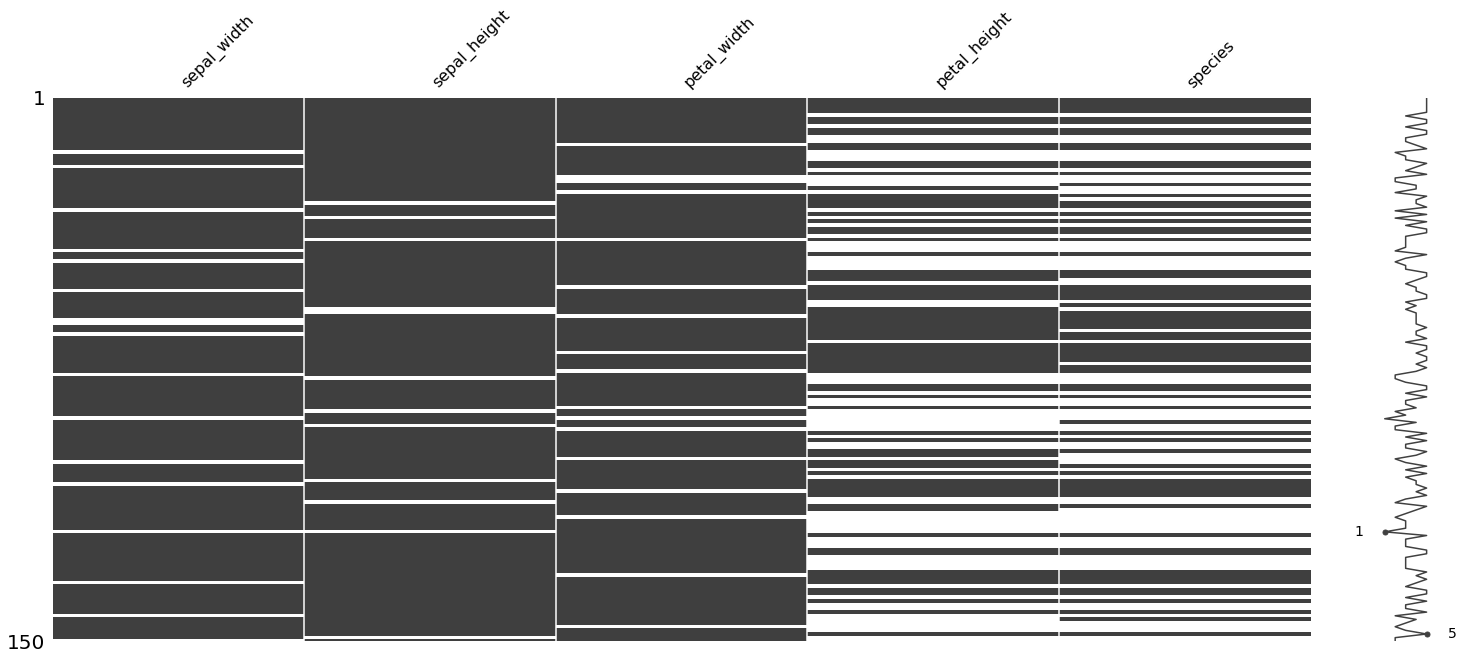

In [21]:
import missingno as msno

msno.matrix(missing_df)

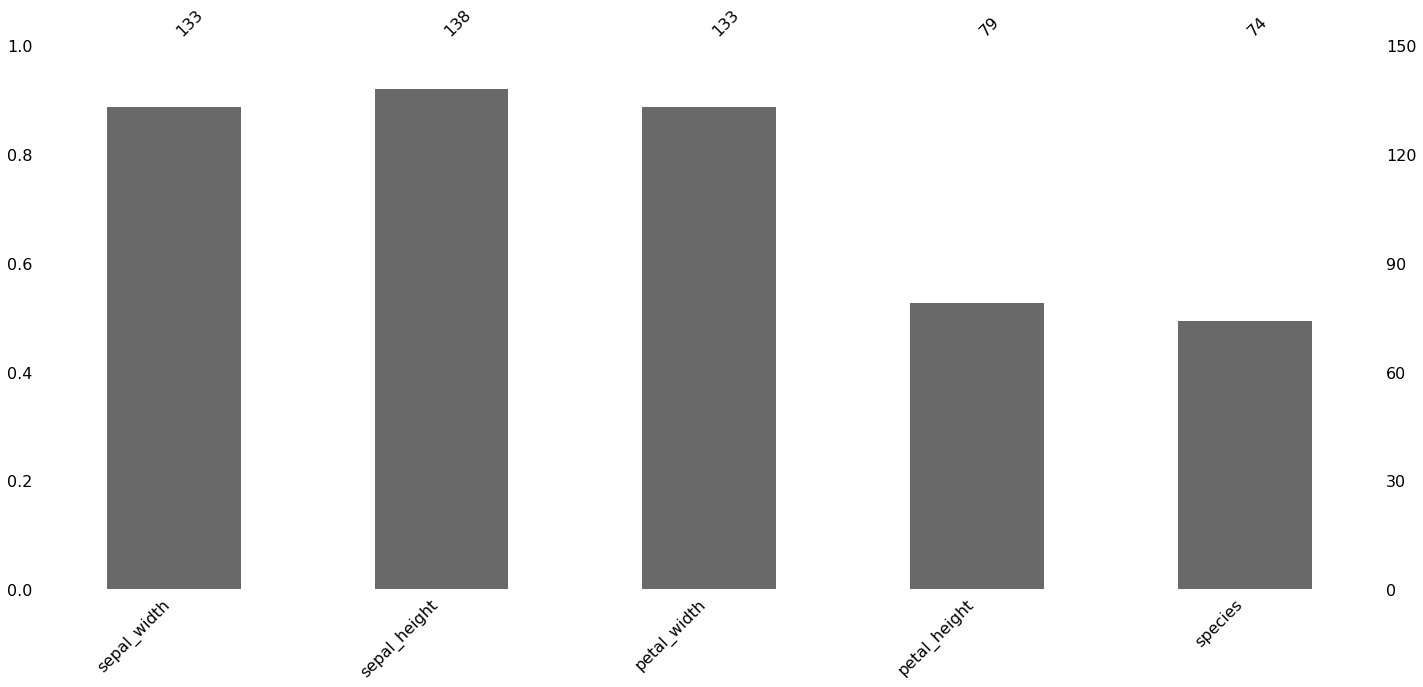

In [22]:
msno.bar(missing_df)

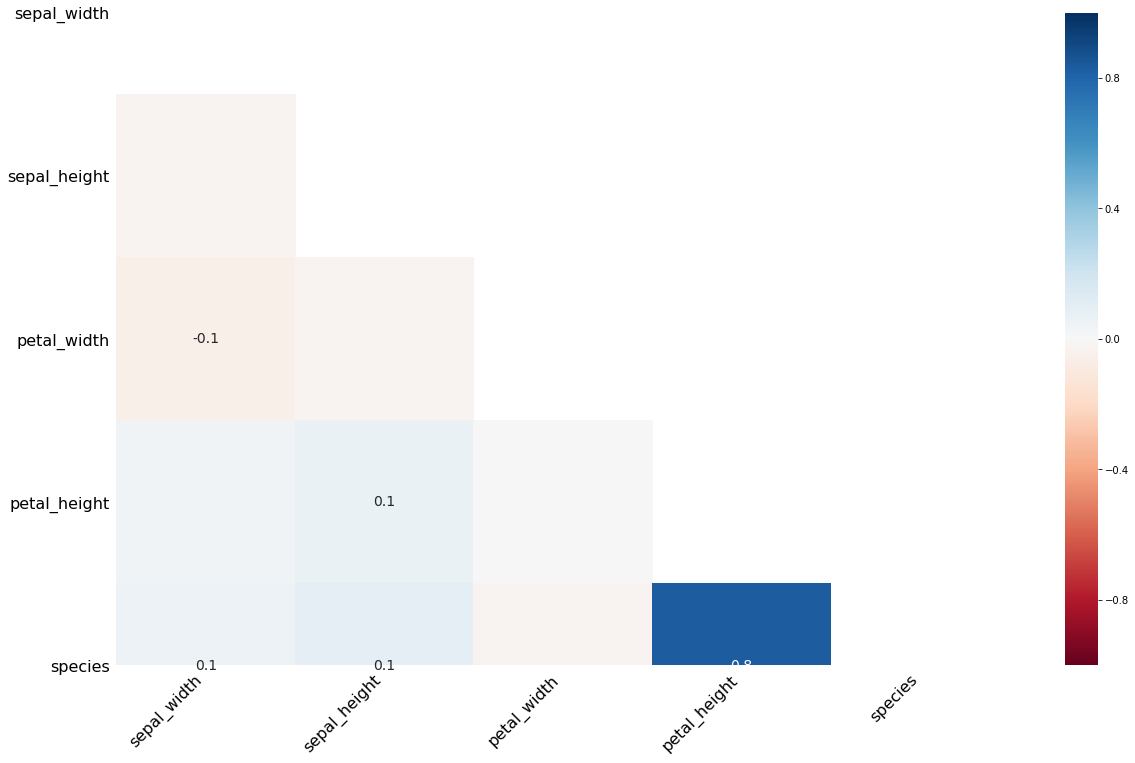

In [23]:
msno.heatmap(missing_df)

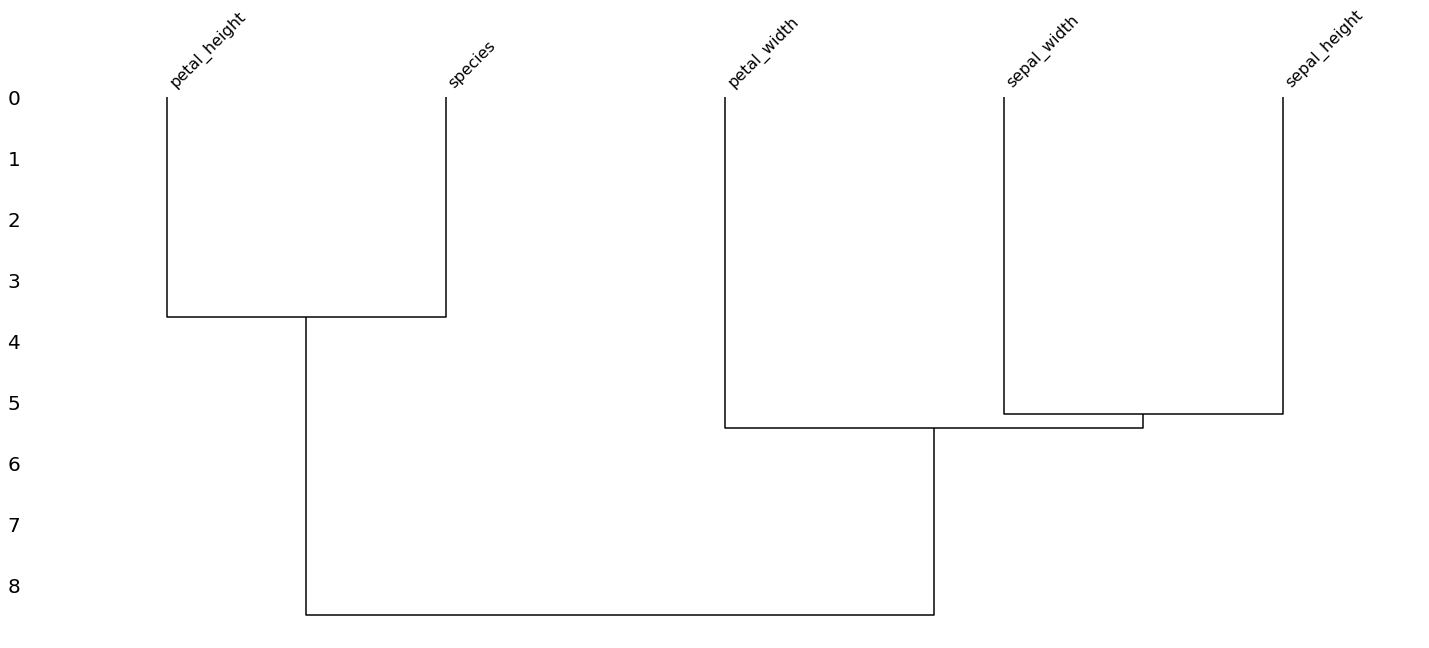

In [24]:
msno.dendrogram(missing_df)